11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
750/750 [==============================] - 105s 133ms/step - loss: 0.4971 - accuracy: 0.8433 - val_loss: 0.0960 - val_accuracy: 0.9694 - lr: 0.0010
Epoch 2/50
750/750 [==============================] - 77s 102ms/step - loss: 0.1996 - accuracy: 0.9379 - val_loss: 0.0973 - val_accuracy: 0.9705 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - 74s 99ms/step - loss: 0.1537 - accuracy: 0.9522 - val_loss: 0.0448 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - 73s 98ms/step - loss: 0.1344 - accuracy: 0.9589 - val_loss: 0.0442 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 5/50
750/750 [==============================] - 73s 97ms/step - loss: 0.1192 - accuracy: 0.9639 - val_loss: 0.0408 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 6/50
750/750 [==============================] - 73s 97ms/step - loss: 0.1135 - accuracy: 0.9651 - val_loss: 0.0356 - val_accuracy: 0.9895 - l

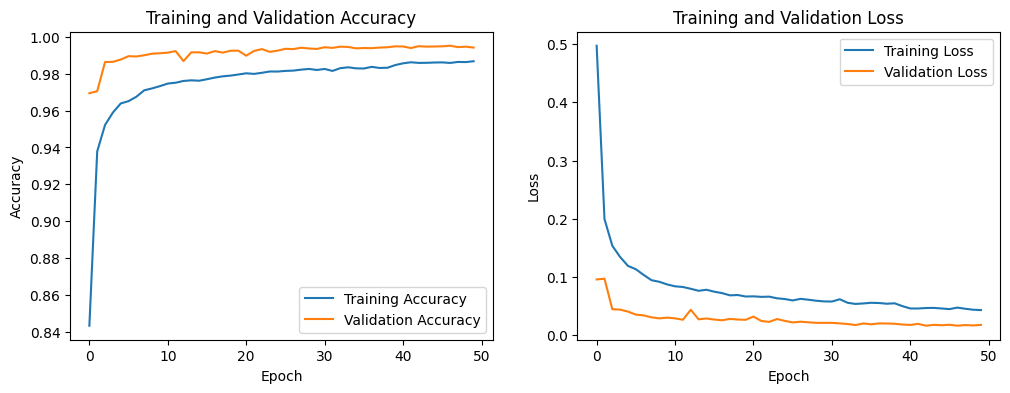

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step


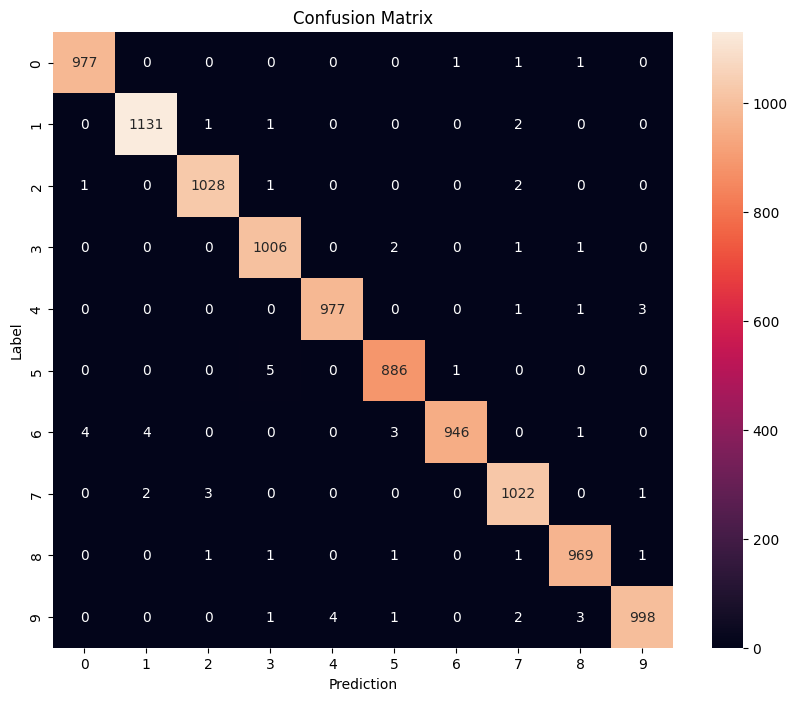

In [1]:
# Gerekli kütüphaneleri yükleyelim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri toplama ve temizleme adımı
# Bu kısımda örnek olarak MNIST veri setini kullanacağız

# MNIST veri setini yükleyelim
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Veriyi normalize edelim
x_train = x_train / 255.0
x_test = x_test / 255.0

# Veriyi CNN modeline uygun hale getirelim
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Eğitim ve doğrulama setlerine bölelim
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Modelin kurulması
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Modelin derlenmesi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Erken durdurma ve öğrenme oranı azaltma geri çağırmaları
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Modelin eğitilmesi
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Performans değerlendirmesi
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Eğitim sürecini görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Modelin kaydedilmesi
model.save('cnn_model.h5')

# Performans metriklerini gösterme
y_pred = np.argmax(model.predict(x_test), axis=-1)
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10),
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.title('Confusion Matrix')
plt.show()